# Algorithms & Complexity Assignment: Sorting

This notebook delves into different sorting algorithms for my algorithms & complexity course.

In computer science, sorting algorithms put elements of a list into order. Efficient sorting is important for optimizing the efficiency of algorithms like search, merge & aggregation. The output must be a monotonic permutation - meaning it has to adhere the order type specified and retaining all of the original elements. 

Around 1951, Betty Holberton was among the authors of the earliest sorting algorthims working on ENIAC, the first programmable electronic general-purpose computer completed in 1945. Bubble Sort, a sorting algorithm with time complexity of O(n²), was analyzed as early as 1956. And new algorithms are still being invented such as Timsort in 2002. Sorting algorithms are studied a lot in introductory Computer Science courses because they introduce concepts such as big O notation, divide-and-conquer algorithms, recursion, heaps, binary trees, best/worst/average case complexity...etc.

In this document we're going to explore some sorting algorithms in pseudo-code, then test each algorithm with random arrays of sizes ranging from length of 10 to 20,000 integers. We are using a series of random arrays so we can plot the time complexity of each algorithm. Using the same array length will allow us to compare. 

In [87]:
import random
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math 
import time

#Create a list of random integers of length n
def createRandomList(n: int) -> list:
    random_list = []
    for i in range(0, n):
        random_list.append(random.randint(0,1000))
    return random_list

### Selection Sort:

Let's start off with implementing the Selection Sort algorithm: 

Selection Sort sorts the array by repeatedly selecting the smallest (or largest) element from the unsorted portion and swapping it with the first unsorted element. This process iterates until the array is sorted as follows:

1. Start with the first element as the initial position
2. Find the smallest element in the unsorted portion of the array
3. Swap this smallest element with the first unsorted element
4. Move the boundary of the sorted portion one element forward
5. Repeat steps 2 through 4 for the remaining unsorted elements until the array is sorted

Since we have 2 nested loops, this algorithm has O(n²) complexity and only uses one extra variable so it has O(1) auxiliary space. It does not maintain the relative order of equal elements

FUNCTION selectionSort(arr):
    n = LENGTH(arr)  // Get the length of the array

    FOR i FROM 0 TO n - 1 DO:
        minIndex = i                 // Pointer for the beginning of the unsorted section
        tmpIndex = minIndex          // Temporary pointer for the minimum value index we find

        // Find the index of the minimum value in the unsorted section
        FOR j FROM i TO n - 1 DO:
            IF arr[j] < arr[tmpIndex] THEN:
                tmpIndex = j         // Update tmpIndex if a smaller value is found

        // Reassign values if minIndex is different than tmpIndex
        IF minIndex != tmpIndex THEN:
            SWAP arr[tmpIndex] WITH arr[minIndex]  // Swap the found minimum value with the first unsorted element
END FUNCTION

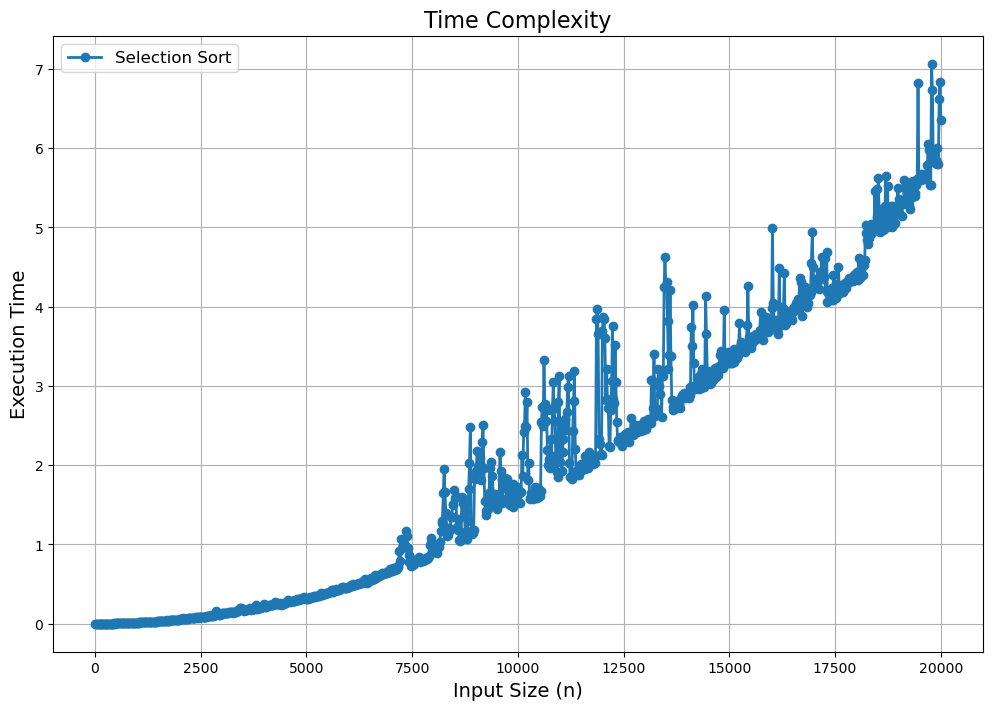

In [88]:
#Selection sort implemented in ascending order

def selectionSort(arr):
    n = len(arr)
    for i in range(n):
        minIndex = i #pointer for beginning of unsorted section
        tmpIndex = minIndex #temporary pointer for the minimum value index we find

        #find the index of the minimum value in the unsorted section
        for j in range(i, n):
            if arr[j] < arr[tmpIndex]:
                tmpIndex = j

        #reassign values if minIndex is different than tmpIndex
        if minIndex != tmpIndex:
            arr[tmpIndex], arr[minIndex] = arr[minIndex], arr[tmpIndex]

            

input_sizes = np.linspace(10,20001,1000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    selectionSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Selection Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Quick Sort

Let's go ahead and try a faster sorting algorithm with less time complexity. For this part let's take a look at Quick Sort:

QuickSort is a sorting algorithm based on the Divide and Conquer that picks an element as a pivot and partitions the given array around the picked pivot by placing the pivot in its correct position in the sorted array.

There are mainly three steps in the algorithm:
1. Choose a pivot
2. Partition the array around pivot. After partition, it is ensured that all elements are smaller than all right and we get index of the end point of smaller elements. The left and right may not be sorted individually.
3. Recursively call for the two partitioned left and right subarrays.
4. We stop recursion when there is only one element is left.

**Time Complexity:**
- **Best Case:** Ω(N log N) - Achieved when the pivot divides the array into equal halves.
- **Average Case:** θ(N log N) - Generally performs well in practice.
- **Worst Case:** O(N²) - Occurs with unbalanced partitions, such as when the array is already sorted and the worst pivot is chosen. Mitigation strategies include using techniques like the median-of-three and randomized algorithms.

**Advantages:**
- Efficient for large datasets due to low overhead.
- Cache-friendly as it sorts in place without extra arrays.
- Fastest general-purpose sorting algorithm when stability is not required.
- Tail recursive, allowing for tail call optimization.

**Disadvantages:**
- Poor worst-case time complexity (O(N²)) if pivots are chosen poorly.
- Not ideal for small datasets.
- Not stable; relative order of equal elements may not be preserved.

FUNCTION partition(array, low, high):
    pivot = array[high]               // Choose the last element as pivot
    i = low - 1                       // Pointer for the smaller element

    // Iterate through the array
    FOR j FROM low TO high - 1 DO:
        IF array[j] < pivot THEN:
            i = i + 1                 // Increment index of smaller element
            SWAP array[i] WITH array[j] // Swap current element with the element at index i

    SWAP array[i + 1] WITH array[high] // Move pivot to its correct position
    RETURN i + 1                      // Return the partitioning index

FUNCTION quickSort(array, low = None, high = None):

    IF low IS None THEN:
        low = 0                       // Initialize low if not provided
    IF high IS None THEN:
        high = LENGTH(array) - 1      // Initialize high if not provided

    IF low < high THEN:
        pi = partition(array, low, high) // Partition the array
        quickSort(array, low, pi - 1   // Recursively sort elements before partition
        quickSort(array, pi + 1, high) // Recursively sort elements after partition
END FUNCTION

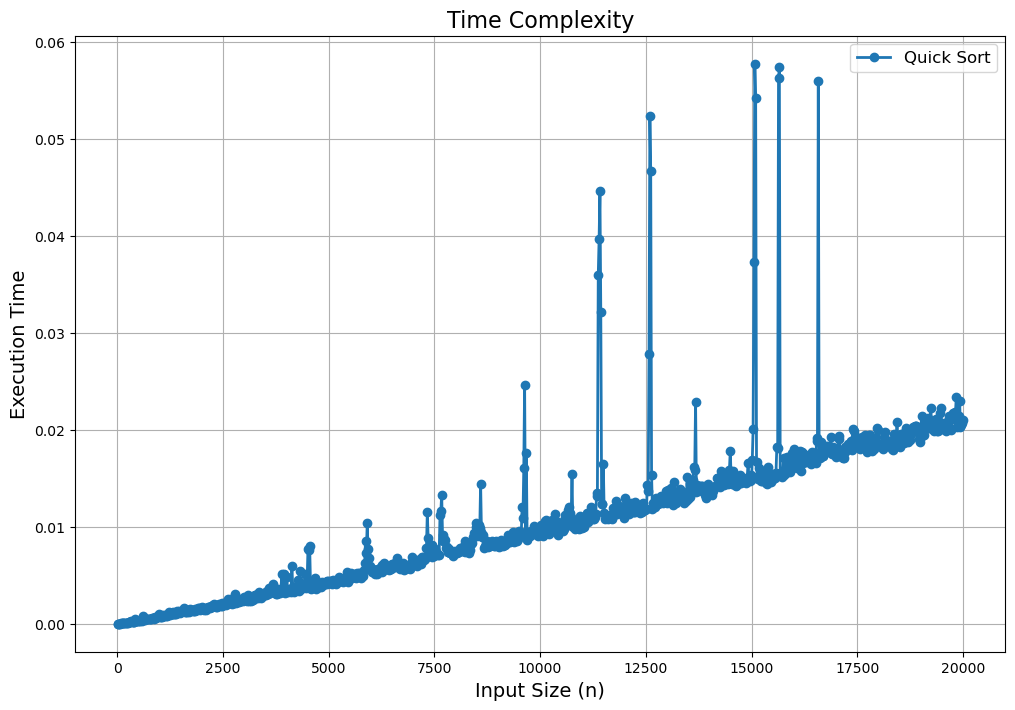

In [89]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] < pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i+1], array[high] = array[high], array[i+1]
    return i + 1

def quickSort(array, low = None, high = None):
    if low is None: 
        low = 0 
    if high is None: 
        high = len(array) - 1 
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

input_sizes = np.linspace(10,20001,1000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    quickSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Quick Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

### Merge Sort: 

Merge Sort is another divide & conquer algorithm like Quick Sort. It works by recursively dividing the input array into smaller subarrays and sorting those subarrays then merging them back together to obtain the sorted array. It has O(n * Log(n)) runningtime which is optimal for comparison based algorithms

Here are the steps:

1. Divide: Divide the list or array recursively into two halves until it can no more be divided.
2. Conquer: Each subarray is sorted individually using the merge sort algorithm.
3. Merge: The sorted subarrays are merged back together in sorted order. The process continues until all elements from both subarrays have been merged.

In practice, recursively, it would work like this:
 
1. Split array in half
2. Call merge sort on each half to sort them recursively
3. Merge both halves into one sorted array

FUNCTION mergeSort(arr):
    IF LENGTH(arr) > 1 THEN:
        // Split the array into two halves
        left_array = arr[0 : LENGTH(arr) // 2]    // Left half
        right_array = arr[LENGTH(arr) // 2 : ]    // Right half
        
        // Recursively sort both halves
        mergeSort(left_array)
        mergeSort(right_array)

        i = 0  // Index for left array
        j = 0  // Index for right array
        k = 0  // Index for merged array

        // Merge the two halves in sorted order
        WHILE i < LENGTH(left_array) AND j < LENGTH(right_array) DO:
            IF left_array[i] < right_array[j] THEN:
                arr[k] = left_array[i]          // Add element from left array
                i = i + 1                        // Move to the next element in left array
            ELSE:
                arr[k] = right_array[j]         // Add element from right array
                j = j + 1                        // Move to the next element in right array
            k = k + 1                            // Move to the next position in merged array

        // Add remaining elements from left_array, if any
        WHILE i < LENGTH(left_array) DO:
            arr[k] = left_array[i]
            i = i + 1
            k = k + 1

        // Add remaining elements from right_array, if any
        WHILE j < LENGTH(right_array) DO:
            arr[k] = right_array[j]
            j = j + 1
            k = k + 1
END FUNCTION

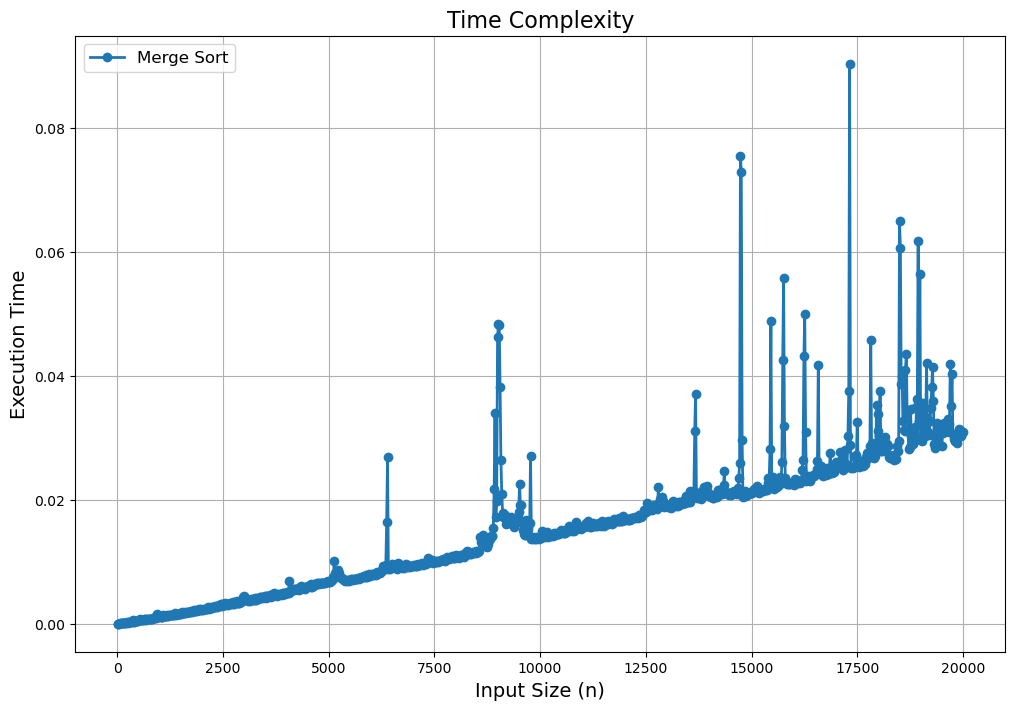

In [90]:
def mergeSort(arr):
    if len(arr) > 1:
        #Split Arrays
        left_array = arr[:len(arr)//2]
        right_array = arr[len(arr)//2:]
        
        #recursively further split the arrays
        mergeSort(left_array)
        mergeSort(right_array)

        i = 0 #left array index
        j = 0 #right array index
        k = 0 #merged array index

        #Merge the arrays in sorted order
        while i < len(left_array) and j < len(right_array):
            if left_array[i] < right_array[j]:
                arr[k] = left_array[i]
                i += 1
            else:
                arr[k] = right_array[j]
                j += 1
            k += 1

        #Add remaining elements to the merged array 
        while i < len(left_array):
            arr[k] = left_array[i]
            i += 1
            k += 1
        while j < len(right_array):
            arr[k] = right_array[j]
            j += 1
            k += 1

input_sizes = np.linspace(10,20001,1000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    mergeSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Merge Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 
        

For the next sorting algorithm I want to try Bubble Sort, which is the simplest sorting algorithm that works by repeatedly swapping adjacent elements if they are in a wrong order. This algorithm is not suitable for large datasets as its average and worst-case time complexity are quite high. 

1. Start at the first array element
2. Compare the current element with the next one
3. If the current element is greater than the next one, swap them
4. increment the index and repeat
5. after each pass through the array, the largest unsorted element is placed at its correct position at the end of the array
6. repeat the process for the remaining unsorted elements

Bubble Sort is stable and requires no additional memory space but it has a time complexity of O(n²) which is not adequate for large datasets

FUNCTION bubbleSort(arr):
    n = LENGTH(arr)                  // Get the length of the array

    WHILE n > 1 DO:
        FOR i FROM 0 TO n - 2 DO:    // Iterate from the start to the second last element
            IF arr[i] > arr[i + 1] THEN:
                SWAP arr[i] WITH arr[i + 1] // Swap if the current element is greater than the next element
        n = n - 1                    // Reduce the effective size of the array to be sorted
END FUNCTION

In [ ]:
def bubbleSort(arr):
    n = len(arr)
    while n > 1:
        for i in range(0, n-1):
            if arr[i] > arr[i+1]:
                arr[i], arr[i+1] = arr[i+1], arr[i]
        n -= 1

input_sizes = np.linspace(10,20011,2000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    bubbleSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Bubble Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

KeyboardInterrupt: 

For my fifth sorting algorithm, I'm gonna go with Heap Sort. It is a comparison-based sorting based on the binary heap structure. It can be seen as an optimization over selection sort where we find the max element and swap it with the last and repeat the process for the remaining elements. In heap sort we use Binary Heap (binary tree) so that we can quickly find and move the max element in O(Log n) instead of O(n), achieving O(n Log n) time complexity. 

In a binary heap, the value of each node must less than or equal to the value of its child-nodes. So the node with the smallest value is at the top or root of the tree. So we will have to create a binary heap class with methods for insertion/deletion...etch that maintain the required properties. 

1. Treat the array as a complete binary tree
2. Build a Max Heap
3. Sort the array by placing the largest element at the end of the unsorted array

FUNCTION heapify(arr, n, i):
    largest = i                       // Initialize largest as root
    l = 2 * i + 1                     // Left child index
    r = 2 * i + 2                     // Right child index

    // If left child is larger than root
    IF l < n AND arr[l] > arr[largest] THEN:
        largest = l                   // Update largest if left child is larger

    // If right child is larger than largest so far
    IF r < n AND arr[r] > arr[largest] THEN:
        largest = r                   // Update largest if right child is larger

    // If largest is not root
    IF largest != i THEN:
        SWAP arr[i] WITH arr[largest] // Swap the root with the largest child

        // Recursively heapify the affected sub-tree
        heapify(arr, n, largest)      // Call heapify on the affected subtree
END FUNCTION

// Main function to perform heap sort
FUNCTION heapSort(arr):
    n = LENGTH(arr)                  // Get the length of the array

    // Build heap (rearrange array)
    FOR i FROM n // 2 - 1 DOWNTO 0 DO:
        heapify(arr, n, i)           // Build a max heap

    // One by one extract elements from heap
    FOR i FROM n - 1 DOWNTO 1 DO:
        SWAP arr[0] WITH arr[i]      // Move root to end

        // Call max heapify on the reduced heap
        heapify(arr, i, 0)            // Heapify the root element
END FUNCTION

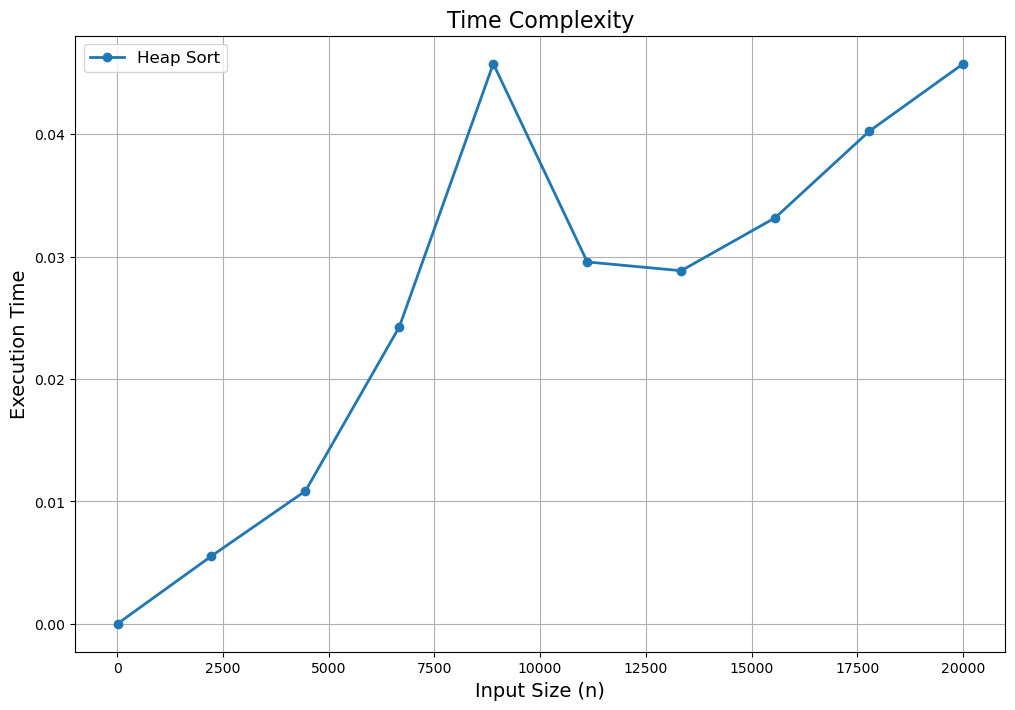

In [ ]:
# Python program for implementation of heap Sort

# To heapify a subtree rooted with node i
# which is an index in arr[].
def heapify(arr, n, i):
    
     # Initialize largest as root
    largest = i 
    
    #  left index = 2*i + 1
    l = 2 * i + 1 
    
    # right index = 2*i + 2
    r = 2 * i + 2  

    # If left child is larger than root
    if l < n and arr[l] > arr[largest]:
        largest = l

    # If right child is larger than largest so far
    if r < n and arr[r] > arr[largest]:
        largest = r

    # If largest is not root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap

        # Recursively heapify the affected sub-tree
        heapify(arr, n, largest)

# Main function to do heap sort
def heapSort(arr):
    
    n = len(arr) 

    # Build heap (rearrange array)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):
      
        # Move root to end
        arr[0], arr[i] = arr[i], arr[0] 

        # Call max heapify on the reduced heap
        heapify(arr, i, 0)
        
input_sizes = np.linspace(10,20011,2000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    heapSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Heap Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

Let's try Insertion sort which works by iteratively inserting each element of an unsorted list into its correct position in a sorted portion of the list. So it has an average time-complexity of O(n²) and a space complexity of O(1). Though it is stable, it is not efficient for large lists

FUNCTION insertionSort(arr):
    // Start from the second element (index 1)
    FOR i FROM 1 TO LENGTH(arr) - 1 DO:
        j = i                          // Set j to the current index

        // Move elements of arr[0..i-1], that are greater than arr[i],
        // to one position ahead of their current position
        WHILE j > 0 AND arr[j - 1] > arr[j] DO:
            SWAP arr[j - 1] WITH arr[j] // Swap if the previous element is greater
            j = j - 1                   // Move to the previous index
END FUNCTION

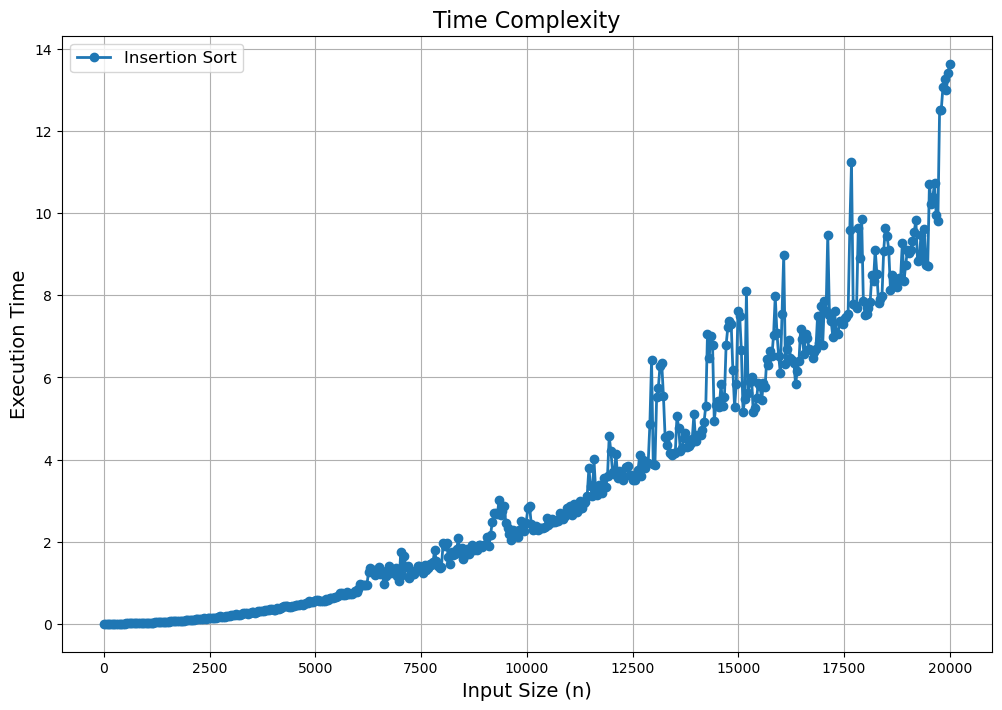

In [ ]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        while arr[j - 1] > arr[j] and j > 0:
            arr[j-1], arr[j] = arr[j], arr[j-1]
            j -= 1

input_sizes = np.linspace(10,20011,2000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    insertionSort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='Insertion Sort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 

the built-in sort() method used in Java and Python is a hybrid sorting algorithms derived from merge sort and insertion sort, called the timsort algorithm. In any real-world data, there is likely some segment of the array that is sorted, Timsort exploits this by looking for "Runs", which is what these sorted segments are called. Another key term is "Min Run", which is the minimal length of the Runs in our array. Timsort creates runs using binary insertion sort on the divided array segments. It has a time complexity of O(N LOG N).

FUNCTION insertion_sort(arr, left = 0, right = None):
    IF right IS None THEN:
        right = LENGTH(arr) - 1      // Set right to the last index if not provided

    // Iterate through the array, starting from the second element
    FOR i FROM left + 1 TO right DO:
        key_item = arr[i]             // Select the current element
        j = i - 1                      // Start comparing with the previous element

        // Shift elements that are greater than key_item to the right
        WHILE j >= left AND arr[j] > key_item DO:
            arr[j + 1] = arr[j]       // Shift element to the next position
            j = j - 1                  // Move to the previous element

        arr[j + 1] = key_item          // Place key_item in its correct position

    RETURN arr                        // Return the sorted array

FUNCTION merge(left, right):
    i, j = 0, 0                       // Initialize indices for left and right arrays
    merged = []                       // Initialize an empty array for merged results

    WHILE i < LENGTH(left) AND j < LENGTH(right) DO:
        IF left[i] < right[j] THEN:
            merged.APPEND(left[i])   // Add smaller element to merged array
            i = i + 1                 // Move to the next element in left
        ELSE:
            merged.APPEND(right[j])  // Add smaller element to merged array
            j = j + 1                 // Move to the next element in right

    merged.EXTEND(left[i:])           // Add remaining elements from left array, if any
    merged.EXTEND(right[j:])          // Add remaining elements from right array, if any

    RETURN merged                     // Return the merged array

FUNCTION tim_sort(arr):
    min_run = 32                      // Initialize the minimum run size
    n = LENGTH(arr)                   // Find the length of the array

    // Perform insertion sort on each segment of size min_run
    FOR i FROM 0 TO n WITH STEP min_run DO:
        insertion_sort(arr, i, MIN(i + min_run - 1, n - 1)) // Sort each segment

    size = min_run                    // Start merging from size min_run
    WHILE size < n DO:
        FOR start FROM 0 TO n WITH STEP size * 2 DO:
            midpoint = start + size   // Calculate midpoint for merging
            end = MIN(start + size * 2 - 1, n - 1) // Calculate end index

            // Merge the two subarrays
            merged_array = merge(arr[start:midpoint], arr[midpoint:end + 1])

            // Assign the merged array back to original array
            arr[start:start + LENGTH(merged_array)] = merged_array

        size = size * 2               // Increase merge size for next iteration

    RETURN arr                        // Return the sorted array

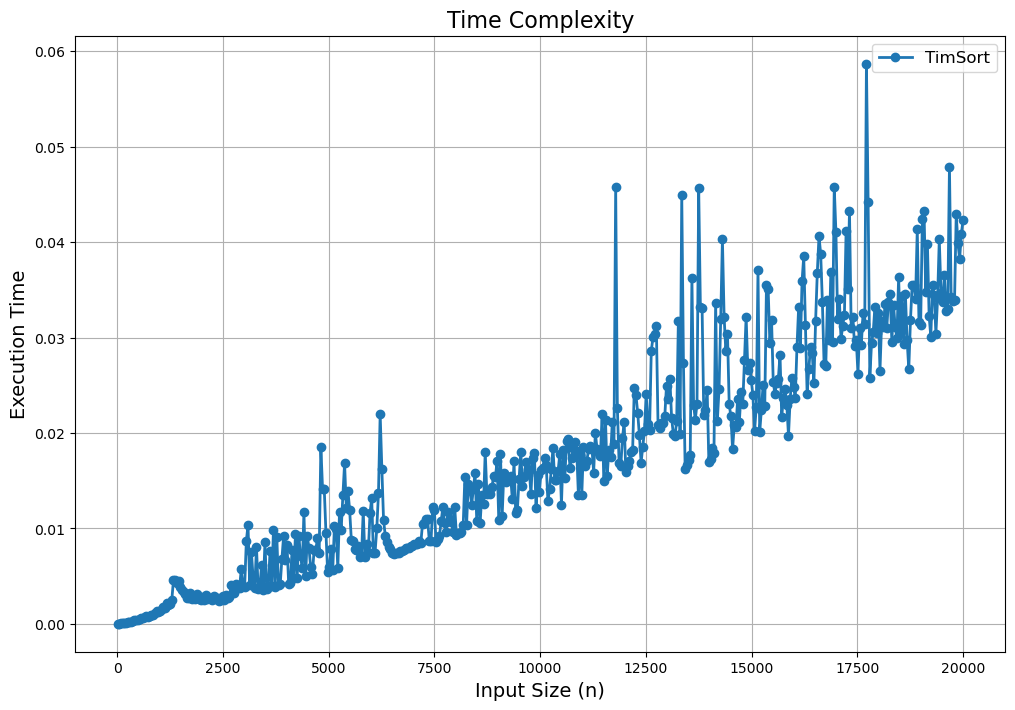

In [ ]:
def insertion_sort(arr, left=0, right=None):
    # Base case: if the array is already sorted, do nothing
    if right is None:
        right = len(arr) - 1

    # Iterate through the array, starting from the second element
    for i in range(left + 1, right + 1):
        # Select the current element
        key_item = arr[i]

        # Compare the current element with the previous one
        j = i - 1

        # While the previous element is greater than the current one,
        # shift the previous element to the next position
        while j >= left and arr[j] > key_item:
            arr[j + 1] = arr[j]
            j -= 1

        # Once the loop ends, the previous element is less than or equal to
        # the current element, so place the current element after it
        arr[j + 1] = key_item

    return arr


def merge(left, right):
    i, j = 0, 0
    merged = []

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    merged.extend(left[i:])
    merged.extend(right[j:])

    return merged


def tim_sort(arr):
    # Initialize the minimum run size
    min_run = 32

    # Find the length of the array
    n = len(arr)

    # Traverse the array and do insertion sort on each segment of size min_run
    for i in range(0, n, min_run):
        insertion_sort(arr, i, min(i + min_run - 1, (n - 1)))

    # Start merging from size 32 (or min_run)
    size = min_run
    while size < n:
        # Divide the array into merge_size
        for start in range(0, n, size * 2):
            # Find the midpoint and endpoint of the left and right subarrays
            midpoint = start + size
            end = min((start + size * 2 - 1), (n - 1))

            # Merge the two subarrays
            merged_array = merge(arr[start:midpoint], arr[midpoint:end + 1])

            # Assign the merged array to the original array
            arr[start:start + len(merged_array)] = merged_array

        # Increase the merge size for the next iteration
        size *= 2

    return arr

input_sizes = np.linspace(10,20011,2000)
execution_times = []

for size in input_sizes:
    test_list = createRandomList(int(size))
    start_time = time.time()
    tim_sort(test_list)
    end_time = time.time()
    execution_times.append(end_time - start_time)


# Plot Measured Times and Complexities
plt.figure(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o', label='TimSort', linewidth=2)

# Customize Plot
plt.title('Time Complexity', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=14)
plt.ylabel('Execution Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show() 